In [5]:
import os
import torch
import torchvision
from torch import nn
from torchvision.datasets import CIFAR10
from torch.utils.data import DataLoader
from torchvision import transforms
from collections import OrderedDict
import datetime

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# workdir = '/Users/erichansen/Desktop/Classes/9.520/project/'
workdir = './'

# Read Inputs

In [8]:
def add_effective_epoch(df):
#     print(df.columns)
    df['layer_effective_epoch'] = (df['round']) * df['max_epochs'] + df['epoch']
    if 'layer' in df.columns:
        df['effective_epoch'] = (df['round'] * 3 * df['max_epochs']) + (df['layer'] * df['max_epochs']) + df['epoch']
    else:
        df['effective_epoch'] = df['layer_effective_epoch']
    
    return df

In [9]:
def read_results_df(filename):
    return add_effective_epoch(pd.read_csv(workdir + f'results/{filename}.csv'))

In [10]:
# filename = '2022-12-11-08-44_CNN_layerwise.csv'
# filename2 = '2022-12-11-09-03_CNN_backprop.csv'

## Network DFs

In [11]:
MLP_layerwise_128_MNIST_norm = read_results_df('2022-12-12-06-16_MLP_layerwise')
MLP_backprop_128_MNIST_norm = read_results_df('2022-12-12-06-18_MLP_backprop')
CNN_layerwise_64_MNIST_norm = read_results_df('2022-12-12-06-25_CNN_layerwise')
CNN_backprop_64_MNIST_norm = read_results_df('2022-12-12-06-32_CNN_backprop')

## Experiment DFs

In [71]:
CNN_layerwise_64_CIFAR10_exp1

,Unnamed: 0,type,epoch,top1,top5,loss,time,network_norm,layer,round,...,weight_decay,learning_rate,invariant,condition,max_epochs,model,train_strategy,model_strategy,layer_effective_epoch,effective_epoch
0,0,train,0,0.24426,0.75878,0.008308,5.2,8.283385,0,0,...,0.01,0.001,False,exp2_rounds5_epochs20_CIFAR10,5,CNN,layerwise,CNN_layerwise,0,0
1,1,test,0,0.24430,0.76090,0.008297,NaN,NaN,0,0,...,0.01,0.001,False,exp2_rounds5_epochs20_CIFAR10,5,CNN,layerwise,CNN_layerwise,0,0
2,2,train,1,0.29174,0.79576,0.007914,5.2,8.612446,0,0,...,0.01,0.001,False,exp2_rounds5_epochs20_CIFAR10,5,CNN,layerwise,CNN_layerwise,1,1
3,3,test,1,0.29420,0.79540,0.007902,NaN,NaN,0,0,...,0.01,0.001,False,exp2_rounds5_epochs20_CIFAR10,5,CNN,layerwise,CNN_layerwise,1,1
4,4,train,2,0.31284,0.81102,0.007726,5.2,8.904820,0,0,...,0.01,0.001,False,exp2_rounds5_epochs20_CIFAR10,5,CNN,layerwise,CNN_layerwise,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,5,test,2,0.38600,0.85830,0.007028,NaN,NaN,2,19,...,0.01,0.001,False,exp2_rounds5_epochs20_CIFAR10,5,CNN,layerwise,CNN_layerwise,97,297
596,6,train,3,0.39366,0.86084,0.006980,5.0,13.702105,2,19,...,0.01,0.001,False,exp2_rounds5_epochs20_CIFAR10,5,CNN,layerwise,CNN_layerwise,98,298
597,7,test,3,0.38490,0.85720,0.007028,NaN,NaN,2,19,...,0.01,0.001,False,exp2_rounds5_epochs20_CIFAR10,5,CNN,layerwise,CNN_layerwise,98,298
598,8,train,4,0.39396,0.86072,0.006982,5.0,13.680938,2,19,...,0.01,0.001,False,exp2_rounds5_epochs20_CIFAR10,5,CNN,layerwise,CNN_layerwise,99,299


In [72]:
df = pd.read_csv('./results/2022-12-13-07-28_CNN_layerwise.csv')
df['condition'] = 'exp1_rounds20_epochs5_CIFAR10'
df.to_csv('./results/2022-12-13-07-28_CNN_layerwise.csv', index=False)

In [73]:
# CNN ===

# Experiment 1 - CIFAR 10
CNN_layerwise_64_CIFAR10_exp1 = read_results_df('2022-12-13-07-28_CNN_layerwise')

# Experiment 1 - MNIST
CNN_layerwise_64_MNIST_exp1 = read_results_df('2022-12-11-12-19_CNN_layerwise')
CNN_backprop_64_MNIST = read_results_df('2022-12-11-12-35_CNN_backprop')

# Experiment 2 - CIFAR 10
CNN_layerwise_64_CIFAR10_exp2 = read_results_df('2022-12-13-05-26_CNN_layerwise')
CNN_backprop_64_CIFAR10 = read_results_df('2022-12-13-06-29_CNN_backprop')


# - 

# Experiment 2 - MNIST
CNN_layerwise_16_MNIST_exp2 = read_results_df('2022-12-11-08-44_CNN_layerwise')
CNN_layerwise_64_MNIST_exp2 = read_results_df('2022-12-11-19-17_CNN_layerwise')
CNN_backprop_16_MNIST = read_results_df('2022-12-11-09-03_CNN_backprop')
CNN_backprop_64_MNIST_expanded = read_results_df('2022-12-11-23-13_CNN_backprop')

## MLP ===
    
# Experiment 1 - CIFAR 10 - 512
MLP_layerwise_512_CIFAR10_exp1 = read_results_df('2022-12-10-18-02_MLP_layerwise')
MLP_backprop_512_CIFAR10 = read_results_df('2022-12-10-02-21_MLP_backprop')

# - '2022-12-10-18-02_MLP_layerwise'
# - '2022-12-10-02-21_MLP_backprop'

# Experiment 1 - MNIST - 512
MLP_layerwise_512_MNIST_exp1 = read_results_df('2022-12-11-03-04_MLP_layerwise')
MLP_backprop_512_MNIST = read_results_df('2022-12-11-03-19_MLP_backprop')
    
# Experiment 1 - MNIST - 128
MLP_layerwise_128_MNIST_exp1 = read_results_df('2022-12-11-06-30_MLP_layerwise')

# Experiment 2 - CIFAR 10 - 512
MLP_layerwise_512_CIFAR10_exp2 = read_results_df('2022-12-10-22-30_MLP_layerwise')

# Experiment 2 - MNIST - 512
MLP_layerwise_512_MNIST_exp2 = read_results_df('2022-12-10-22-30_MLP_layerwise')
    
# Experiment 2 - MNIST - 128
MLP_layerwise_128_MNIST_exp2 = read_results_df('2022-12-11-04-13_MLP_layerwise')
MLP_backprop_128_MNIST = read_results_df('2022-12-11-04-41_MLP_backprop')


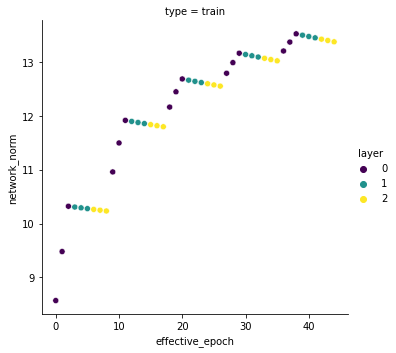

In [36]:
plot_cross_layer_results(CNN_layerwise_64_MNIST_norm[CNN_layerwise_64_MNIST_norm['type'] == 'train'], y='network_norm', 
                         filename='CNN_layerwise_64_MNIST_crosslayer_norm')

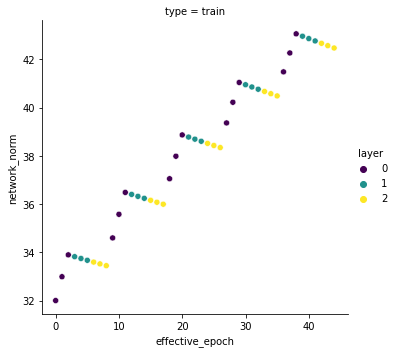

In [35]:
plot_cross_layer_results(MLP_layerwise_128_MNIST_norm[MLP_layerwise_128_MNIST_norm['type'] == 'train'], y='network_norm', 
                         filename='MLP_layerwise_128_MNIST_crosslayer_norm')

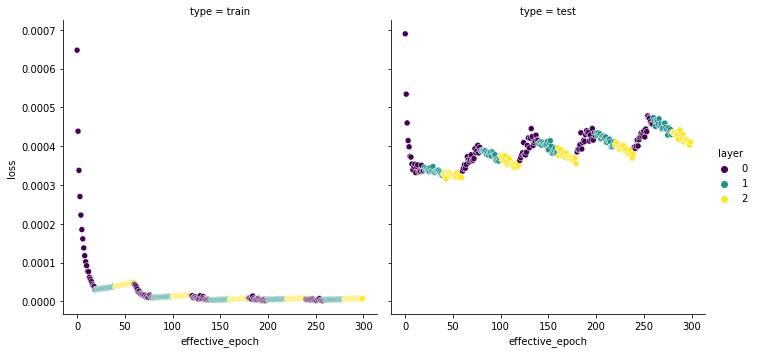

In [54]:
plot_cross_layer_results(MLP_layerwise_128_MNIST_exp2, y='loss', filename='MLP_layerwise_128_MNIST_exp2_crosslayer_loss')

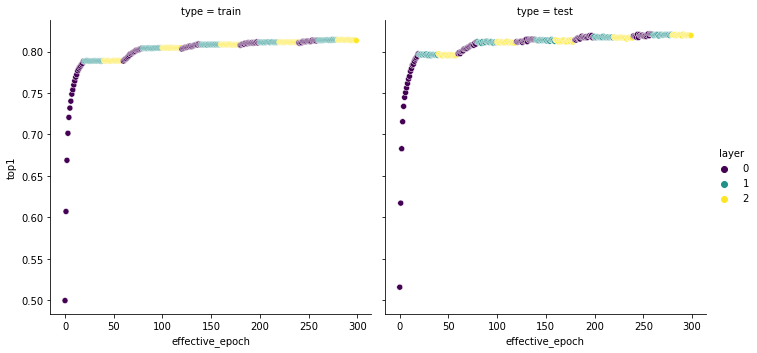

In [50]:
plot_cross_layer_results(CNN_layerwise_64_MNIST_exp2, y='top1', filename='CNN_layerwise_64_MNIST_exp1_crosslayer_top1')

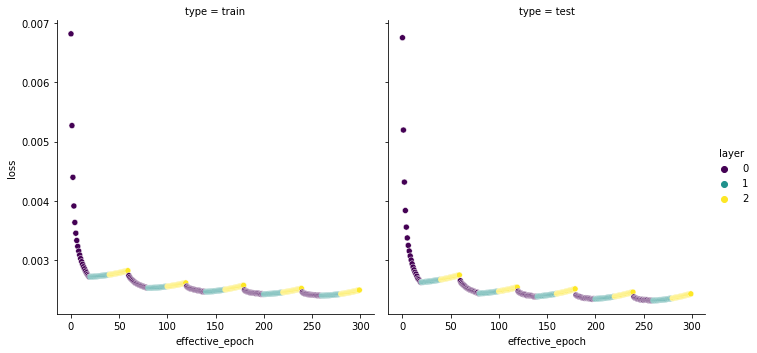

In [32]:
plot_cross_layer_results(CNN_layerwise_64_MNIST_exp2, y='loss', filename='CNN_layerwise_64_MNIST_exp1_crosslayer_loss')

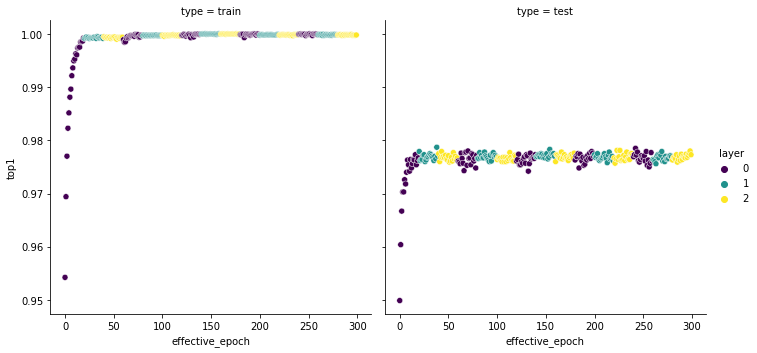

In [52]:
plot_cross_layer_results(MLP_layerwise_128_MNIST_exp2, y='top1', filename='MLP_layerwise_128_MNIST_exp2_crosslayer_top1')

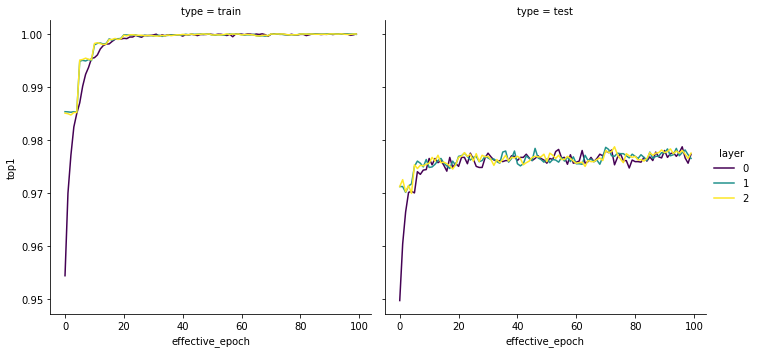

In [28]:
plot_cross_layer_results(MLP_layerwise_128_MNIST_exp1, y='top1')

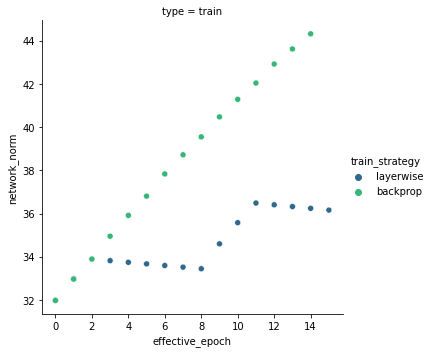

In [85]:
plot_compare_layerwise_backprop_dfs(MLP_layerwise_128_MNIST_norm[
                                    (MLP_layerwise_128_MNIST_norm['effective_epoch'] <= 15) & 
                                    (MLP_layerwise_128_MNIST_norm['type'] == 'train')], 
                                    MLP_backprop_128_MNIST_norm[MLP_backprop_128_MNIST_norm['type'] == 'train'],
                                    x='effective_epoch', layers=[0, 1, 2], y='network_norm',
                                    filename='MLP_128_norm_comparison')


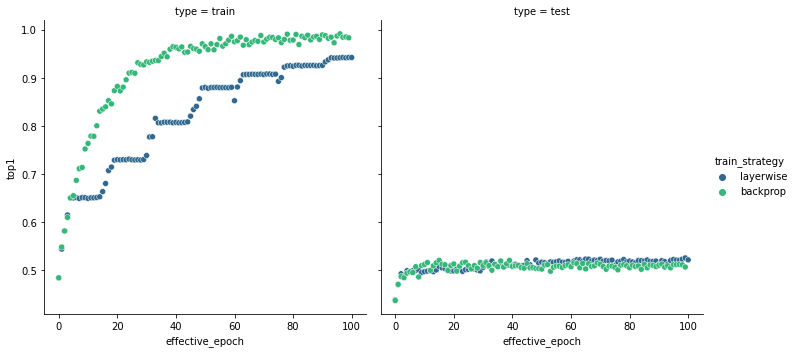

In [41]:
plot_compare_layerwise_backprop_dfs(MLP_layerwise_512_CIFAR10_exp1[MLP_layerwise_512_CIFAR10_exp1['effective_epoch'] <= 100], MLP_backprop_512_CIFAR10,
                                    x='effective_epoch', layers=[0, 1, 2], y='top1', filename='MLP_512_effective_epoch_top1_comparison')

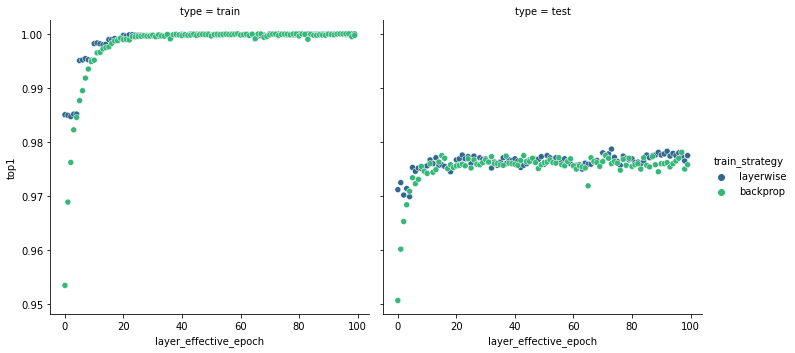

In [46]:
plot_compare_layerwise_backprop_dfs(MLP_layerwise_128_MNIST_exp1, MLP_backprop_128_MNIST,
                                    x='layer_effective_epoch', layers=[2], y='top1', filename='MLP_128_layer_effective_epoch_top1_comparison')

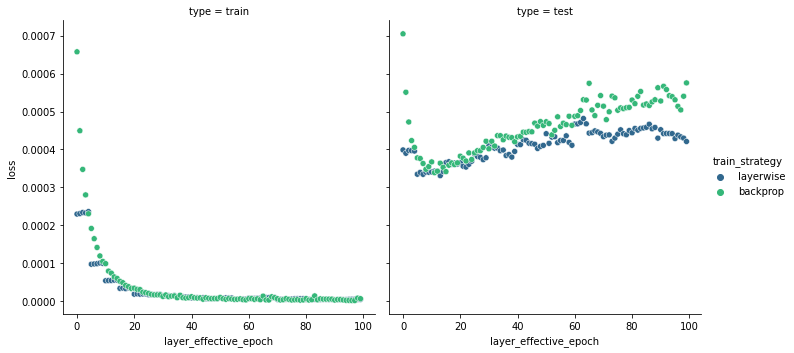

In [47]:
plot_compare_layerwise_backprop_dfs(MLP_layerwise_128_MNIST_exp1, MLP_backprop_128_MNIST,
                                    x='layer_effective_epoch', layers=[2], y='loss', filename='MLP_128_layer_effective_epoch_loss_comparison')

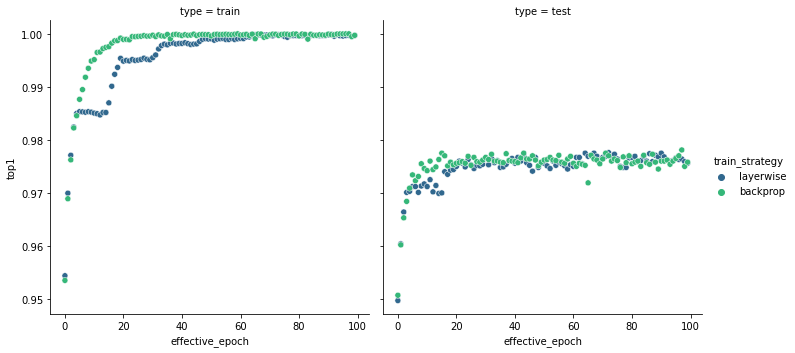

In [49]:
plot_compare_layerwise_backprop_dfs(MLP_layerwise_128_MNIST_exp1[MLP_layerwise_128_MNIST_exp1['effective_epoch'] < 100], MLP_backprop_128_MNIST,
                                    x='effective_epoch', layers=[0, 1, 2], y='top1', filename='MLP_128_effective_epoch_top1_comparison')

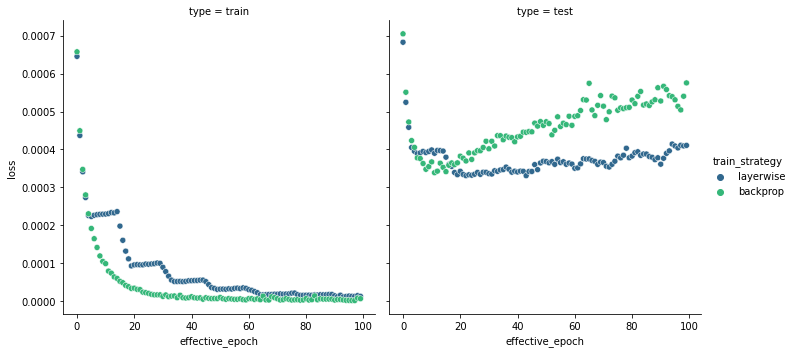

In [48]:
plot_compare_layerwise_backprop_dfs(MLP_layerwise_128_MNIST_exp1[MLP_layerwise_128_MNIST_exp1['effective_epoch'] < 100], MLP_backprop_128_MNIST,
                                    x='effective_epoch', layers=[0, 1, 2], y='loss', filename='MLP_128_effective_epoch_loss_comparison')

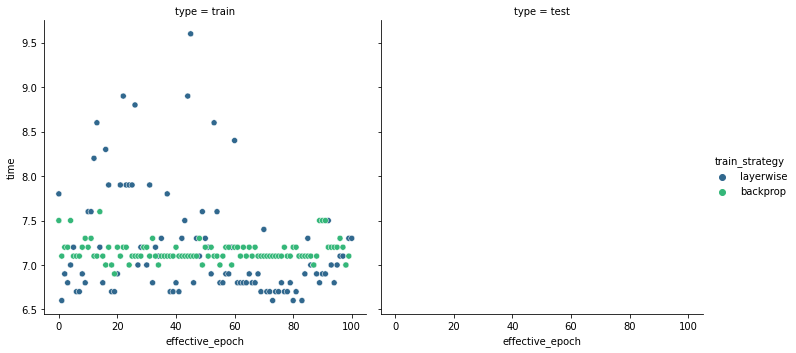

In [26]:
plot_compare_layerwise_backprop_dfs(MLP_layerwise_128_MNIST_exp1[MLP_layerwise_128_MNIST_exp1['effective_epoch'] <= 100], MLP_backprop_128_MNIST,
                                    x='effective_epoch', layers=[0, 1, 2], y='time', filename='MLP_128_top1_effective_epoch_time_comparison')

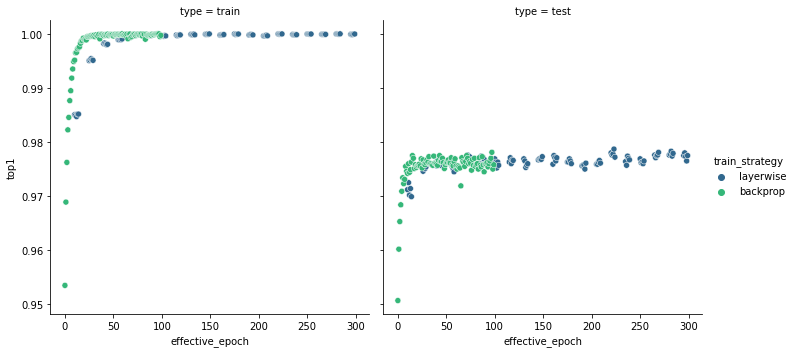

In [28]:
plot_compare_layerwise_backprop_dfs(MLP_layerwise_128_MNIST_exp1, MLP_backprop_128_MNIST, x='effective_epoch', layers=[2], y='top1')

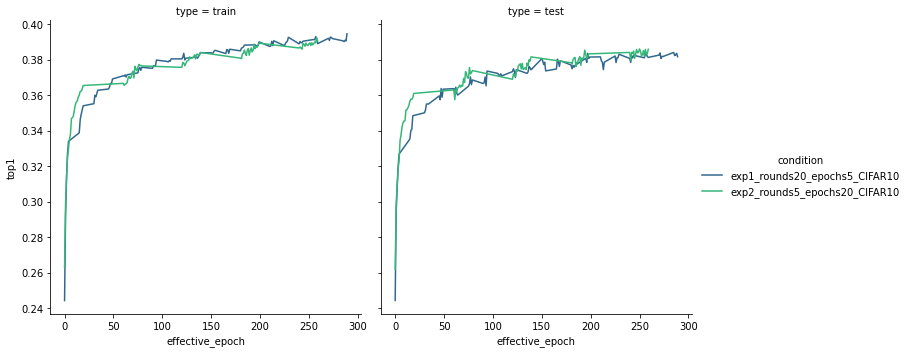

In [75]:
plot_layerwise_experiment_dfs(CNN_layerwise_64_CIFAR10_exp1, CNN_layerwise_64_CIFAR10_exp2, y='top1')

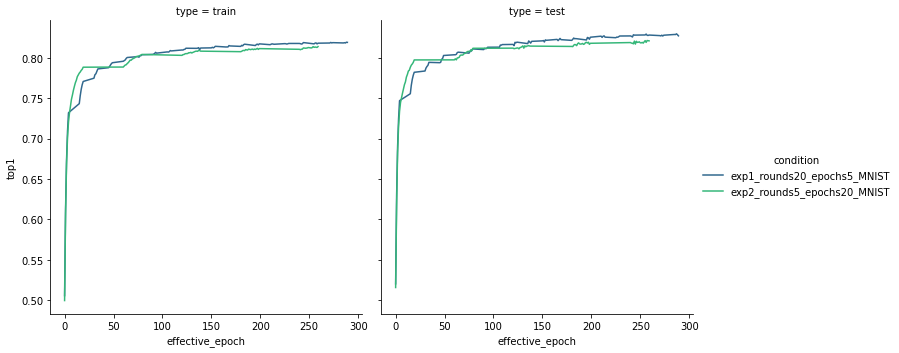

In [77]:
plot_layerwise_experiment_dfs(CNN_layerwise_64_MNIST_exp1, CNN_layerwise_64_MNIST_exp2, y='top1', 
                              filename='CNN_layerwise_64_MNIST_top1_condition_comparison')

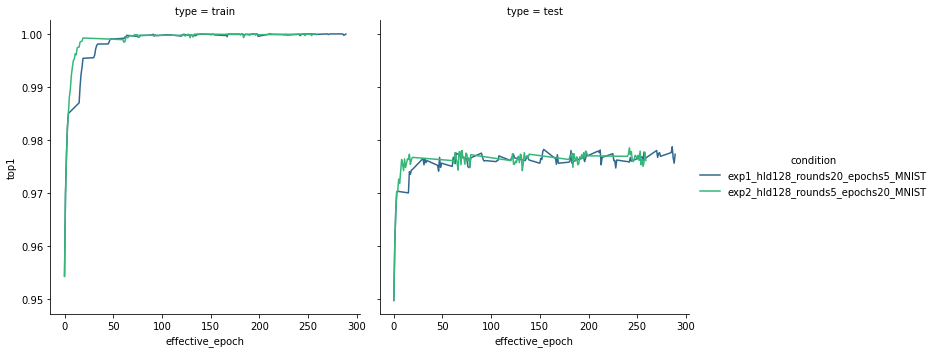

In [78]:
plot_layerwise_experiment_dfs(MLP_layerwise_128_MNIST_exp1, MLP_layerwise_128_MNIST_exp2, y='top1',
                              filename='MLP_layerwise_128_MNIST_top1_condition_comparison')

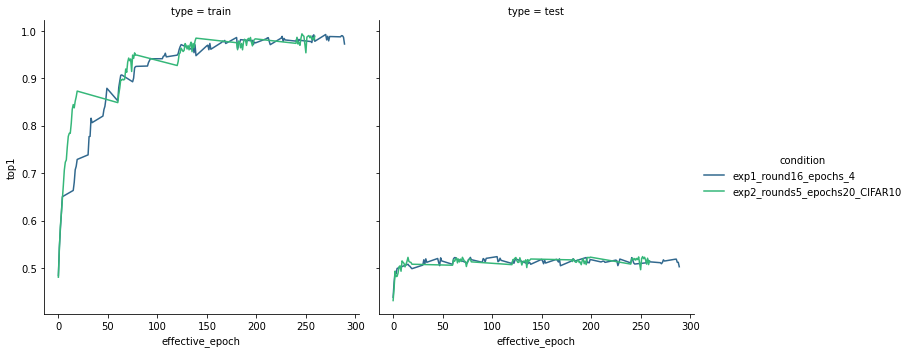

In [64]:
plot_layerwise_experiment_dfs(MLP_layerwise_512_CIFAR10_exp1, MLP_layerwise_512_CIFAR10_exp2, y='top1')

In [30]:
def plot_cross_layer_results(layer_df, x='effective_epoch', y='loss', col='type', filename='temp'):
    
    rel_plot = sns.relplot(
        data=layer_df,
        x=x,
        y=y,
        hue='layer',
        col=col,
        palette='viridis'
    )
    
    fig = rel_plot.fig
    fig.savefig(workdir + 'plots/' + filename + '.png') 

In [60]:
def plot_layerwise_experiment_dfs(layer_df1, layer_df2, layer=0, x='effective_epoch', y='loss', filename='temp'):
    layerwise_df = pd.concat([layer_df1[layer_df1['layer'] == layer], layer_df2[layer_df2['layer'] == layer]]).reset_index()
    
    rel_plot = sns.relplot(
        data=layerwise_df,
        x=x,
        y=y,
        hue='condition',
        col='type',
        palette='viridis',
        kind='line'
    )
    
    fig = rel_plot.fig
    fig.savefig(workdir + 'plots/' + filename + '.png') 

In [16]:
def plot_compare_layerwise_backprop_dfs(layer_df, backprop_df, layers=[0], x='effective_epoch', y='loss', filename='temp'):
    compare_bp_df = pd.concat([layer_df[layer_df['layer'].isin(layers)], backprop_df])
    
    rel_plot = sns.relplot(
        data=compare_bp_df,
        x=x,
        y=y,
        hue='train_strategy',
        col='type',
#         s=10,
        palette='viridis',
#         kind='line'
    )
    
    fig = rel_plot.fig
    fig.savefig(workdir + 'plots/' + filename + '.png') 

## Old Analysis Functions

In [ ]:
cnn_c1_layerwise_df = read_results_df('2022-12-11-12-19_CNN_layerwise')
cnn_c1_backprop_df = read_results_df('2022-12-11-23-13_CNN_backprop')
cnn_c2_layerwise_df = read_results_df('2022-12-11-19-17_CNN_layerwise')


In [22]:
mlp_c1_layerwise_df = read_results_df('2022-12-11-03-04_MLP_layerwise')
mlp_c2_layerwise_df = read_results_df('2022-12-11-04-30_MLP_layerwise')
mlp_c1_backprop_df = read_results_df('2022-12-11-03-19_MLP_backprop')

## Plot Type 1: Accuracy/Loss over Effective Epochs by Experimenal Conditions

In [123]:
def compare_layer_improvement(df):
    df = df[df['epoch'] == df['epoch'].max()]
    
    df = df.sort_values(by=['round', 'layer'])
    
    type_df = df.groupby(by='type')
    df['layer_top1_imp'] = type_df['top1'].diff()
    df['layer_loss_imp'] = type_df['loss'].diff()
    
    sns.relplot(
        data=df,
        x='round',
        y='layer_top1_imp',
        col='type',
        hue='layer',
        palette='viridis',
        kind='line'
    )
    
    sns.relplot(
        data=df,
        x='round',
        y='layer_loss_imp',
        col='type',
        hue='layer',
        palette='viridis',
#         kind='line'
    )
    
    return df

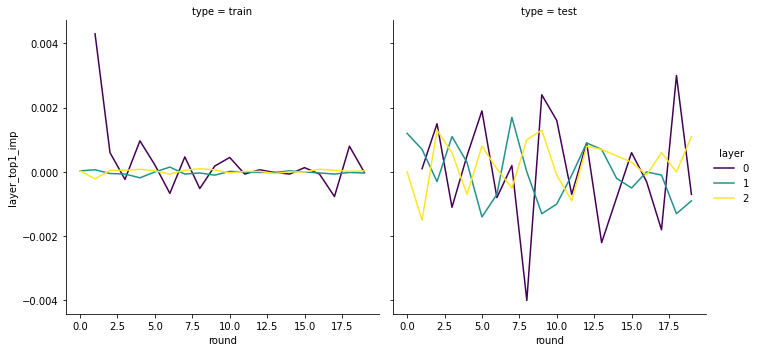

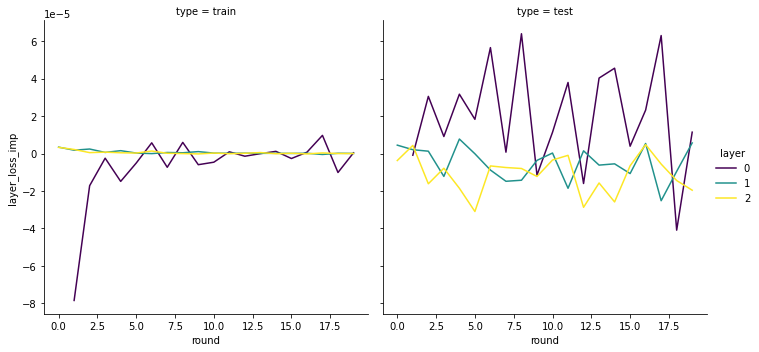

In [34]:
df = compare_layer_improvement(mlp_c2_layerwise_df)